# ML Regression

Regression is a supervised learning method. These models are applied to ML when we are trying to predict a continuous numeric value.

It serves two purposes:

    Interpolation: you can estimate missing data within your data range

    Extrapolation: you can estimate future data outside your data range

In [1]:
import pandas as pd
from zipfile import ZipFile
from io import BytesIO
import requests

url08 ='https://s3.amazonaws.com/capitalbikeshare-data/202308-capitalbikeshare-tripdata.zip'
url09='https://s3.amazonaws.com/capitalbikeshare-data/202309-capitalbikeshare-tripdata.zip'
url10='https://s3.amazonaws.com/capitalbikeshare-data/202310-capitalbikeshare-tripdata.zip'

def import_csv_from_zip (url):
    r = requests.get(url)
    buf1 = BytesIO(r.content)
    with ZipFile(buf1, "r") as f:
        for name in f.namelist():
            if name.endswith('.csv'):
                with f.open(name) as zd:
                    df = pd.read_csv(zd)
                    return df
            

In [3]:
trip08=import_csv_from_zip(url08)
trip09=import_csv_from_zip(url09)
trip10=import_csv_from_zip(url10)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [5]:


trip_import08= trip08.copy()
trip_import09= trip09.copy()
trip_import10= trip10.copy()

def to_datetime_start_end (df):
    df['started_at']= pd.to_datetime(df['started_at'])
    df['ended_at']= pd.to_datetime(df['ended_at'])
    

to_datetime_start_end(trip_import08)
to_datetime_start_end(trip_import09)
to_datetime_start_end(trip_import10)


In [6]:
frames = [trip_import08, trip_import09,trip_import10]


trips08_10 = pd.concat(frames, ignore_index=True)

## filter lost classic bikes

In [22]:
def no_return_classic_df(df):
    # boolean mask for bikes with no end station
    no_end_trip = df['end_station_name'].isnull()
    # df with trips with no endstation
    trips_no_end_filtered = df[no_end_trip]
    # bike type for bikes with no end station
    by_bike_trips_no_end_filtered=trips_no_end_filtered['rideable_type'].value_counts()
    trips_no_end_classic = trips_no_end_filtered[trips_no_end_filtered['rideable_type']=='classic_bike']
    print(by_bike_trips_no_end_filtered)
    return trips_no_end_classic

no_returb08_10= no_return_classic_df(trips08_10)
no_returb08_10.info()
no_returb08_10.head()


rideable_type
electric_bike    150505
classic_bike       1751
docked_bike         281
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1751 entries, 2842 to 1411292
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             1751 non-null   object        
 1   rideable_type       1751 non-null   object        
 2   started_at          1751 non-null   datetime64[ns]
 3   ended_at            1751 non-null   datetime64[ns]
 4   start_station_name  1749 non-null   object        
 5   start_station_id    1749 non-null   float64       
 6   end_station_name    0 non-null      object        
 7   end_station_id      0 non-null      float64       
 8   start_lat           1751 non-null   float64       
 9   start_lng           1751 non-null   float64       
 10  end_lat             247 non-null    float64       
 11  end_lng             247 non-null    float64    

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2842,1D1E094A1D8DE86D,classic_bike,2023-08-03 09:34:08,2023-08-04 10:34:04,S Four Mile Run Dr & Shirlington Rd,31057.0,NaN,NaN,38.844400,-77.085931,NaN,NaN,member
2849,15D70800635C037B,classic_bike,2023-08-17 16:45:53,2023-08-18 17:45:48,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,NaN,NaN,38.888774,-77.028694,NaN,NaN,casual
2910,C5ABDEF69D8B4170,classic_bike,2023-08-22 17:11:54,2023-08-23 18:11:30,Medical Center Metro,32053.0,NaN,NaN,38.999378,-77.097882,NaN,NaN,casual
2939,11EB8BEBD3B4D3F8,classic_bike,2023-08-18 05:51:57,2023-08-19 06:51:51,1st & M St NE,31603.0,NaN,NaN,38.905697,-77.005483,NaN,NaN,casual
2954,12A5729EFC327134,classic_bike,2023-08-12 20:19:52,2023-08-13 21:19:48,Commonwealth Ave & E Monroe Ave,31913.0,NaN,NaN,38.820058,-77.062821,NaN,NaN,casual


<Axes: xlabel='hour', ylabel='ride_id'>

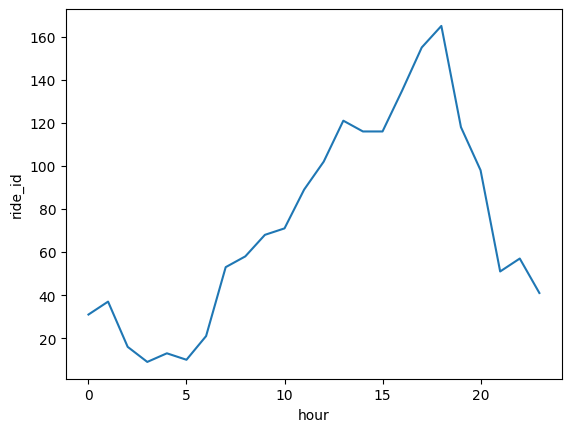

In [32]:
no_returb08_10['hour']=no_returb08_10['started_at'].dt.hour
df_hour = no_returb08_10.groupby(['hour']).count()
sns.lineplot(x='hour', y='ride_id', data=df_hour)

<Axes: xlabel='hour', ylabel='ride_id'>

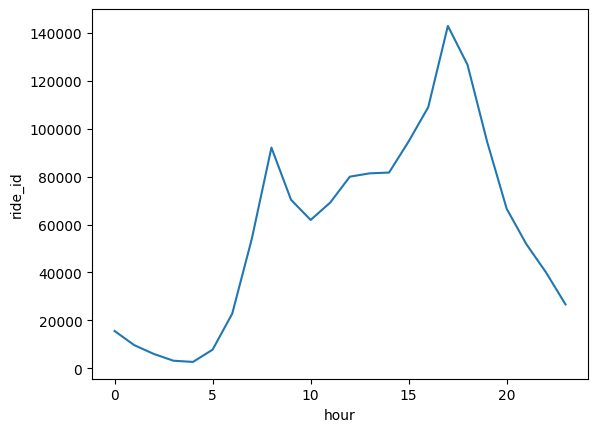

In [33]:
trips08_10['hour']=trips08_10['started_at'].dt.hour
df_hour = trips08_10.groupby(['hour']).count()
sns.lineplot(x='hour', y='ride_id', data=df_hour)

In [38]:
trips08_10_classic = trips08_10[trips08_10['rideable_type']=='classic_bike']
trips08_10_classic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902901 entries, 0 to 1411292
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             902901 non-null  object        
 1   rideable_type       902901 non-null  object        
 2   started_at          902901 non-null  datetime64[ns]
 3   ended_at            902901 non-null  datetime64[ns]
 4   start_station_name  902892 non-null  object        
 5   start_station_id    902892 non-null  float64       
 6   end_station_name    901150 non-null  object        
 7   end_station_id      901150 non-null  float64       
 8   start_lat           902901 non-null  float64       
 9   start_lng           902901 non-null  float64       
 10  end_lat             901397 non-null  float64       
 11  end_lng             901397 non-null  float64       
 12  member_casual       902901 non-null  object        
 13  hour                902901 non-nu

In [36]:


from sklearn.preprocessing import OneHotEncoder

#cheque for unique values in color column
no_returb08_10['member_casual'].unique()

enc=OneHotEncoder()


# create 0, 1 arrays from member_casual
feat_arr=enc.fit_transform(no_returb08_10[['member_casual']]).toarray()

# get arrays
labels = enc.categories_
print(labels)

# create datafram from member type
features= pd.DataFrame(feat_arr, columns=['casual', 'member'])

print(features.head())

# add encoded member columns to df
no_returb08_10_ml=no_returb08_10.reset_index(drop=True)


enc_no_returb08_10_ml=pd.concat([no_returb08_10_ml, features], axis=1)

# drop original member_casual column
enc_no_returb08_10_ml=enc_no_returb08_10_ml.drop('member_casual', axis=1)


enc_no_returb08_10_ml.head()



[array(['casual', 'member'], dtype=object)]
   casual  member
0     0.0     1.0
1     1.0     0.0
2     1.0     0.0
3     1.0     0.0
4     1.0     0.0


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,hour,casual,member
0,1D1E094A1D8DE86D,classic_bike,2023-08-03 09:34:08,2023-08-04 10:34:04,S Four Mile Run Dr & Shirlington Rd,31057.0,NaN,NaN,38.844400,-77.085931,NaN,NaN,9,0.0,1.0
1,15D70800635C037B,classic_bike,2023-08-17 16:45:53,2023-08-18 17:45:48,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,NaN,NaN,38.888774,-77.028694,NaN,NaN,16,1.0,0.0
2,C5ABDEF69D8B4170,classic_bike,2023-08-22 17:11:54,2023-08-23 18:11:30,Medical Center Metro,32053.0,NaN,NaN,38.999378,-77.097882,NaN,NaN,17,1.0,0.0
3,11EB8BEBD3B4D3F8,classic_bike,2023-08-18 05:51:57,2023-08-19 06:51:51,1st & M St NE,31603.0,NaN,NaN,38.905697,-77.005483,NaN,NaN,5,1.0,0.0
4,12A5729EFC327134,classic_bike,2023-08-12 20:19:52,2023-08-13 21:19:48,Commonwealth Ave & E Monroe Ave,31913.0,NaN,NaN,38.820058,-77.062821,NaN,NaN,20,1.0,0.0


Drop unused/ non numeric values